In [116]:
# Reading Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
 # saving file path in a variable
file_path = r"C:\Users\Irfan\Downloads\Data Analyst- Assignment.xlsx"

In [118]:
# reading the file
df = pd.read_excel(file_path, sheet_name = None) 

In [119]:
# reading each sheet inside the excel and saving them into a dictionary
sheet_variables = {}  
for i, (sheet_name, sheet_data) in enumerate(df.items()):
    variable_name = f'df{i + 1}'  
    sheet_variables[variable_name] = sheet_data
print(sheet_variables.keys())
    

dict_keys(['df1', 'df2', 'df3', 'df4'])


In [120]:
# Checking the values of all data sets
print(df1.head(),df2.head(),df3.head(),df4.head(), sep = '\n') 

   SaleID   SaleDate  ProductID  QuantitySold  SaleAmount  StoreID
0       1 2023-08-26         11             4      236.12        7
1       2 2023-07-23         10             1      479.64       10
2       3 2023-08-06          3             1      211.54        7
3       4 2023-12-07         14             4      423.10        6
4       5 2023-02-08         16             2      110.50        3
   ProductID ProductName  ProductCategory   Price
0          1   Product_1   Home & Kitchen  787.32
1          2   Product_2  Beauty & Health  207.68
2          3   Product_3      Electronics  519.09
3          4   Product_4   Home & Kitchen  596.49
4          5   Product_5   Home & Kitchen   55.99
   StoreID StoreName Location Region
0        1   Store_1   City_C   East
1        2   Store_2   City_C  North
2        3   Store_3   City_A   West
3        4   Store_4   City_C   West
4        5   Store_5   City_A  South
   EmployeeID    FirstName    LastName  StoreID         Position   HireDate


In [121]:
# merging Sales data and products data using produc_id
m1 = pd.merge(df1,df2, on ='ProductID') 

In [122]:
# merging the obove dataset with thhe stores dataset using store_id
m2 = pd.merge(m1,df3, on = 'StoreID') 

In [123]:
# finally merging the data set to employees dataset
m3 = pd.merge(m2,df4, on = 'StoreID') 

In [124]:
# Final merged dataset with contains all the 4 datasets of (Sales,Products,Stores,Employees)
# Checking the datatypes and if there are any null values
m3.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25070 entries, 0 to 25069
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SaleID           25070 non-null  int64         
 1   SaleDate         25070 non-null  datetime64[ns]
 2   ProductID        25070 non-null  int64         
 3   QuantitySold     25070 non-null  int64         
 4   SaleAmount       25070 non-null  float64       
 5   StoreID          25070 non-null  int64         
 6   ProductName      25070 non-null  object        
 7   ProductCategory  25070 non-null  object        
 8   Price            25070 non-null  float64       
 9   StoreName        25070 non-null  object        
 10  Location         25070 non-null  object        
 11  Region           25070 non-null  object        
 12  EmployeeID       25070 non-null  int64         
 13  FirstName        25070 non-null  object        
 14  LastName         25070 non-null  objec

In [125]:
# Extracing the month of sale from the SaleDate
m3['SaleMonth'] = m3['SaleDate'].dt.month

In [126]:
# Using groupby function to group by ProductCategogry and SaleMonth and aggregate by the Quantity Sold
monthly_sales_by_category = m3.groupby(['ProductCategory', 'SaleMonth']).agg({'QuantitySold': 'sum'}).reset_index()
monthly_sales_by_category['ProductCategory'].value_counts()

Beauty & Health    12
Clothing           12
Electronics        12
Home & Kitchen     12
Name: ProductCategory, dtype: int64

In [127]:
# Using groupby function to group by StoreID and SaleMonth and aggregate by the Quantity Sold

monthly_sales_by_store = m3.groupby(['StoreID', 'SaleMonth']).agg({'QuantitySold': 'sum'}).reset_index()
monthly_sales_by_store

,StoreID,SaleMonth,QuantitySold
0,1,1,880
1,1,2,800
2,1,3,608
3,1,4,960
4,1,5,704
...,...,...,...
115,10,8,648
116,10,9,376
117,10,10,392
118,10,11,576


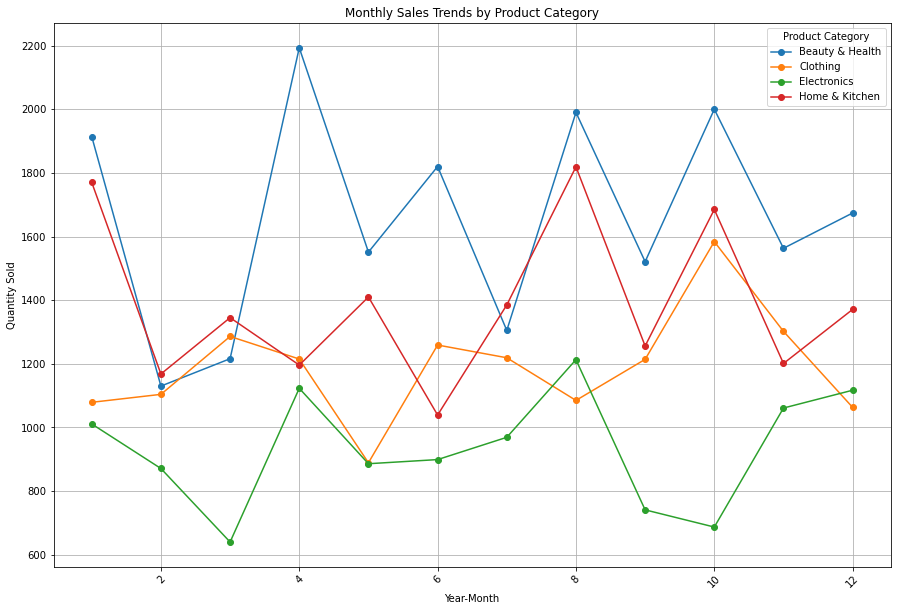

In [128]:
# Monthly Sales Trends by Product Category
unique_categories = monthly_sales_by_category['ProductCategory'].unique()
plt.figure(figsize=(15, 10))
for category in unique_categories:
    category_data = monthly_sales_by_category[monthly_sales_by_category['ProductCategory'] == category]
    plt.plot(category_data['SaleMonth'], category_data['QuantitySold'], label=category,marker = 'o')

plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Year-Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

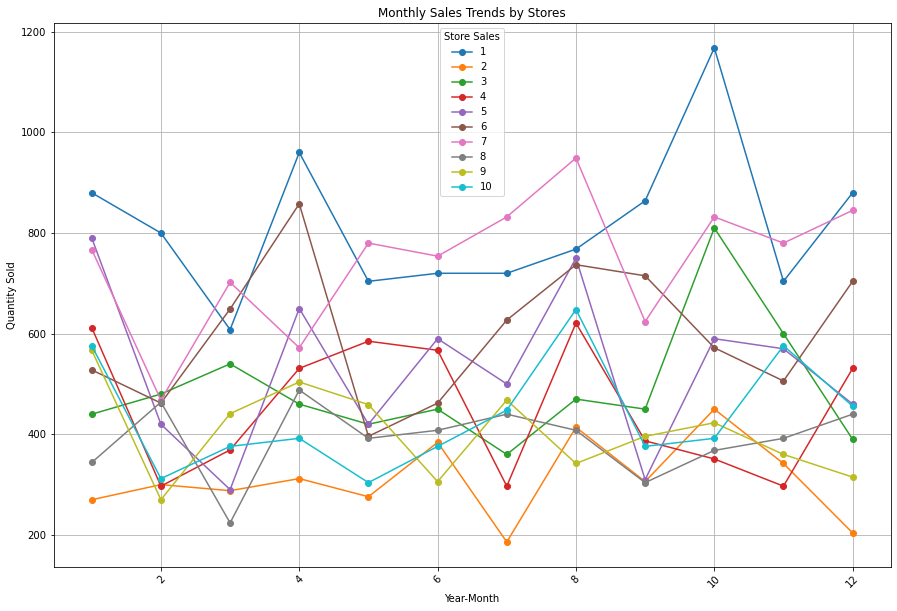

In [130]:
# Monthly Sales Trend by Store
unique_stores = monthly_sales_by_store['StoreID'].unique()
plt.figure(figsize=(15, 10))
for stores in unique_stores:
    store_data = monthly_sales_by_store[monthly_sales_by_store['StoreID'] == stores]
    plt.plot(store_data['SaleMonth'], store_data['QuantitySold'], label=stores,marker = 'o')

plt.title('Monthly Sales Trends by Stores')
plt.xlabel('Year-Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Store Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Root Cause Analysis
1) We can see a steep decline in sales during the months January to February. This maybe bacause of anual employee tunover during these months.
- Also, factors like Economic conditions in different regions can affect consumer spending habits. Economic downturns, job losses, or changes in disposable income can impact purchasing behavior.

2) A steady growth in sales from march till october this can be due to the reason that Employee strenght is consistent and favourable market conditions. 
- But, the sales during these months are inconsistant that may be due to not having adequate product available, changing market trends and regional factors such as festivals etc..

## Action Plan:-
1) 
- Investing in employee training programs to ensure that staff members are knowledgeable about products and equipped with effective sales techniques which will help them to grow professionally and personally this is important for company's growth and profit.
- Establish retention strategies to reduce employee turnover, such as offering competitive wages, medical benefits, providing career advancement opportunities, and fostering a positive work environment. This will inculcate a positive and healthy workspace in the company to retain valuable employees.

2)
- Enhance inventory management processes to ensure adequate stock levels for popular products and minimize instances of stockouts. Utilize data analytics to forecast demand more accurately and optimize inventory replenishment schedules.
- Implementing relevant marketing campaigns and promotional offers may result in consistent customer engagement and higher sales.